In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [12]:
# Veri setini yükleyelim
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

In [13]:
# Bağımsız değişkenler (X) ve hedef değişken (y) belirleyelim
X, y = cancer.data, cancer.target

# Eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [14]:

# Veriyi standart hale getirelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN modelini tanımlayalım ve eğitelim
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Modeli test edelim ve doğruluk değerini hesaplayalım
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)

In [16]:

print(f"Test Doğruluğu: {test_accuracy}")
print(f"Eğitim Doğruluğu: {train_accuracy}")

Test Doğruluğu: 0.9824561403508771
Eğitim Doğruluğu: 0.9773869346733668


In [17]:
# K değerine göre doğruluk değişimini inceleyelim
k_values, accuracy_values = [], []

In [18]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_values.append(accuracy_score(y_test, y_pred))
    k_values.append(k)

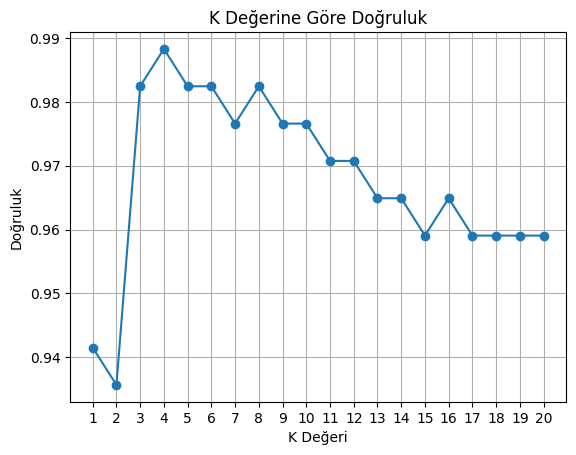

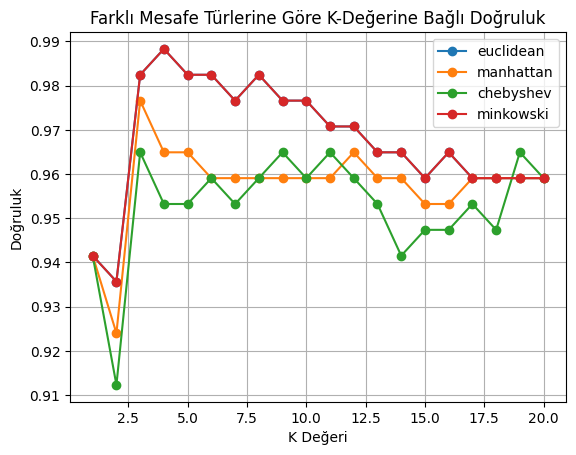

In [19]:
plt.figure()
plt.plot(k_values, accuracy_values, marker="o")
plt.title("K Değerine Göre Doğruluk")
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Mesafe metriklerini karşılaştırma
mesafe_turleri = ["euclidean", "manhattan", "chebyshev", "minkowski"]
sonuclar = {}

for metrik in mesafe_turleri:
    k_values, accuracy_values = [], []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metrik)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_values.append(accuracy_score(y_test, y_pred))
        k_values.append(k)
    sonuclar[metrik] = (k_values, accuracy_values)

plt.figure()
for metrik in mesafe_turleri:
    plt.plot(sonuclar[metrik][0], sonuclar[metrik][1], marker="o", label=f"{metrik}")

plt.title("Farklı Mesafe Türlerine Göre K-Değerine Bağlı Doğruluk")
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid(True)
plt.show()

# KNN Regressor Uygulaması
np.random.seed(0)
X_reg = np.sort(5 * np.random.rand(40, 1), axis=0)
y_reg = np.sin(X_reg).ravel()




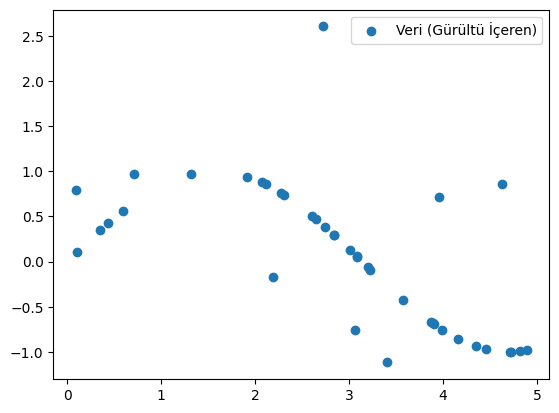

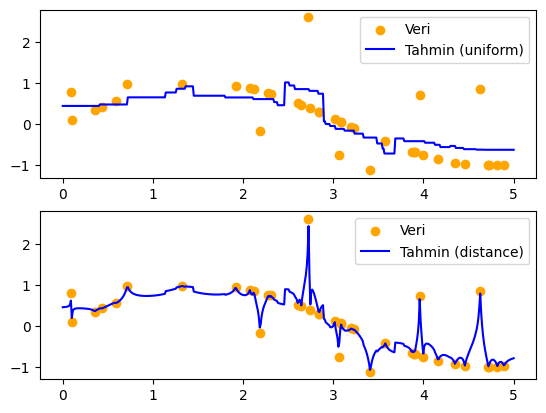

In [20]:
# Gürültü ekleyelim
y_reg[::5] += 5 * (0.5 - np.random.rand(8))

plt.figure()
plt.scatter(X_reg, y_reg, label="Veri (Gürültü İçeren)")
plt.legend()
plt.show()

T = np.linspace(0, 5, 500)[:, np.newaxis]
n_neighbors = 5

plt.figure()
for i, weights in enumerate(["uniform", "distance"]):
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    y_pred = knn_reg.fit(X_reg, y_reg).predict(T)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_reg, y_reg, color="orange", label="Veri")
    plt.plot(T, y_pred, color="blue", label=f"Tahmin ({weights})")
    plt.legend()
plt.show()